In [1]:
#Preamble
import glob
import numpy as np
import scipy.io
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import mdshare
import pyemma
from matplotlib import rc
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["computer modern roman"],
    "font.size": 14})
plw = 0.6
plt.rcParams['axes.linewidth'] = plw
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = plw
plt.rcParams['xtick.minor.width'] = plw
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.major.size'] = 4.5
plt.rcParams['ytick.right'] = True
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.major.width'] = plw
plt.rcParams['ytick.minor.width'] = plw
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.major.size'] = 5
plt.rcParams["figure.figsize"] = (5,4)
from matplotlib.pyplot import figure
import matplotlib.ticker as ticker
import scipy.optimize as opt
from scipy.optimize import curve_fit
from scipy.special import expit as logistic
import numpy as np
import pylab
from scipy.optimize import curve_fit

In [2]:
#Specify loading path appropriately
#Load all sampled data
os.chdir("../")
loading_path = "all_data/basin_0_02_all_locally_sampled"

In [3]:
os.mkdir("figures_MSM")
storing_path = "figures_MSM/"

In [4]:
#Load all data
data = []
data_ic = []
root_pow = 1/3
#Loop through the directories containing the paths
for directory in glob.glob(loading_path,recursive=True):
    print("directory",directory)
    #Loop through the paths
    pathname=directory+"/cn.*.dat"
    for file in glob.glob(pathname):
        print("loading file:",file)
        #Load n nq6 data
        inp = np.loadtxt(file,usecols = (1,2), skiprows=0)
        inp2 = inp[:1] #initial configurations
        data.append(np.power(inp, root_pow))
        data_ic.append(np.power(inp2, root_pow)) #initial configurations
# Data concatenated
DataConc=np.concatenate(data)
DataConc_ic=np.concatenate(data_ic) #initial configurations

directory all_data/basin_0_02_all_locally_sampled
loading file: all_data/basin_0_02_all_locally_sampled/cn.3_7625000_s2.dat
loading file: all_data/basin_0_02_all_locally_sampled/cn.6_7622000_s2.dat
loading file: all_data/basin_0_02_all_locally_sampled/cn.8_7625000.dat
loading file: all_data/basin_0_02_all_locally_sampled/cn.4_7625000_s2.dat
loading file: all_data/basin_0_02_all_locally_sampled/cn.9_7622000_s2.dat
loading file: all_data/basin_0_02_all_locally_sampled/cn.1_7625000.dat
loading file: all_data/basin_0_02_all_locally_sampled/cn.1_7622000_s2.dat
loading file: all_data/basin_0_02_all_locally_sampled/cn.3_7630000.dat
loading file: all_data/basin_0_02_all_locally_sampled/cn.6_7643000.dat
loading file: all_data/basin_0_02_all_locally_sampled/cn.6_7620000.dat
loading file: all_data/basin_0_02_all_locally_sampled/cn.3_7620000.dat
loading file: all_data/basin_0_02_all_locally_sampled/cn.3_7643000.dat
loading file: all_data/basin_0_02_all_locally_sampled/cn.5_7625000_s2.dat
loading f

In [5]:
#To remove the frame reference trajectory
DataConc_ic_1=np.concatenate(data_ic[0:45])
DataConc_ic_2=np.concatenate(data_ic[47:])

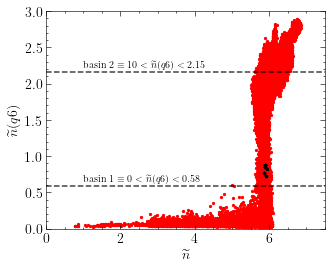

In [6]:
fig, ax = plt.subplots()
#New data in red
ax.scatter(DataConc[:, 0], DataConc[:, 1], s=5, c='red' )
#Initial configurations
ax.scatter(DataConc_ic_1[:, 0], DataConc_ic_1[:, 1], s=5, c='black' )
#Other specifications
plt.plot( np.linspace(0, 7.5), np.linspace(0.5848035476, 0.5848035476), c='black', linestyle='--', linewidth=1.5, alpha=0.75)
plt.plot( np.linspace(0, 7.5), np.linspace(2.15443469, 2.15443469), c='black', linestyle='--', linewidth=1.5, alpha=0.75)
plt.text(1,0.6448035476,'basin $1 \equiv 0< \widetilde{n}(q6) < 0.58$',c='k', fontsize=10)
plt.text(1,2.21443469,'basin $2 \equiv 10< \widetilde{n}(q6) < 2.15$',c='k', fontsize=10)
ax.set_xlim(0, 7.5);
ax.set_ylim(0, 3);
ax.set_xlabel('$\widetilde{n}$');
ax.set_ylabel('$\widetilde{n}(q6)$');
plt.savefig(storing_path+"features_1_2.png", dpi=600, bbox_inches='tight')

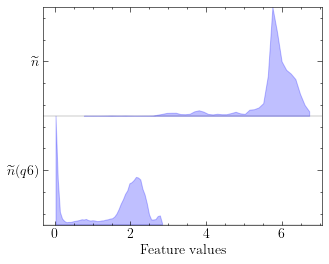

In [7]:
#Plot feature histogram
pyemma.plots.plot_feature_histograms(DataConc, feature_labels=['$\widetilde{n}$','$\widetilde{n}(q6)$']);
plt.savefig(storing_path+"features_1_1.png", dpi=600, bbox_inches='tight')

In [8]:
#Discretisation of the CV space
cluster = pyemma.coordinates.cluster_regspace(data, dmin=0.14)
dtrajs_concatenated = np.concatenate(cluster.dtrajs)
msm = pyemma.msm.estimate_markov_model(cluster.dtrajs, lag=20, count_mode='effective',dt_traj='10 ps')

100%|██████████| 68/68 [00:00<00:00, 3033.24it/s]                               


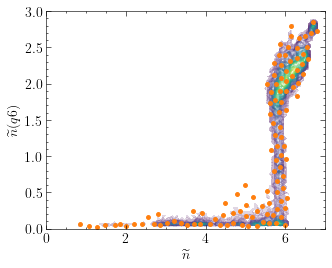

In [9]:
fig, ax = plt.subplots()
#Plot of the discretisation
pyemma.plots.plot_density(*DataConc.T, ax=ax, cbar=False, alpha=0.16);
ax.scatter(*cluster.clustercenters.T, s=15, c='C1');
#Other specifications
ax.set_xlabel('$\widetilde{n}$');
ax.set_ylabel('$\widetilde{n}(q6)$');
ax.set_xlim(0, 7);
ax.set_ylim(0, 3);
plt.savefig(storing_path+"conv_discr_1_2.png", dpi=600, bbox_inches='tight')

In [10]:
#Lagtime analysis for the slowest implied timescale
its = pyemma.msm.its(cluster.dtrajs, lags=[1,5,10,20,30,50,75,100], nits=3, errors='bayes')

estimating BayesianMSM:  38%|███▊      | 3/8 [00:06<00:07,  1.60s/it]

24-03-22 23:21:50 pyemma.msm.estimators.bayesian_msm.BayesianMSM[5] WARNING  Ignored error during estimation: Stationary distribution contains entries smaller than 1e-15 during iteration


estimating BayesianMSM:  62%|██████▎   | 5/8 [00:07<00:02,  1.30it/s]

24-03-22 23:21:50 pyemma.msm.estimators.bayesian_msm.BayesianMSM[5] WARNING  Ignored error during estimation: Stationary distribution contains entries smaller than 1e-15 during iteration


100%|██████████| 8/8 [00:07<00:00,  1.08it/s]                        


24-03-22 23:21:50 pyemma.msm.estimators.implied_timescales.ImpliedTimescales[3] WARNING  Estimation has failed at lagtimes: [ 75 100]. Details:
['Error at lag time 75: Stationary distribution contains entries smaller than '
 '1e-15 during iteration',
 'Error at lag time 100: Stationary distribution contains entries smaller than '
 '1e-15 during iteration']
24-03-22 23:21:51 pyemma.msm.estimators.implied_timescales.ImpliedTimescales[3] WARNING  Some timescales could not be computed. Timescales array is smaller than expected or contains NaNs


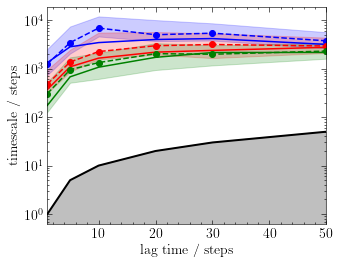

In [11]:
#Plot for such analysis
pyemma.plots.plot_implied_timescales(its, ylog=True);
plt.savefig(storing_path+"conv_discr_1_1.png", dpi=600, bbox_inches='tight')

In [12]:
#Timescales with confidence interval using Bayesian MSM

timescales= msm.timescales(1)
bayesian_msm = pyemma.msm.bayesian_markov_model(cluster.dtrajs, lag=20, conf=0.95, count_mode='effective', dt_traj='10 ps',mincount_connectivity=1E-5)
sample_mean = bayesian_msm.sample_mean('timescales', k=1)
sample_conf_l, sample_conf_r = bayesian_msm.sample_conf('timescales', k=1)

print('ITS from Markov Model:',timescales[0])
print('Mean of first ITS: {:f}'.format(sample_mean[0]))
print('Confidence interval: [{:f}, {:f}]'.format(sample_conf_l[0], sample_conf_r[0]))

1056it [00:01, 1008.26it/s]                                                                                                          
100%|██████████| 100/100 [00:00<00:00, 468.50it/s]                                                                 


ITS from Markov Model: 39901.79996666275
Mean of first ITS: 47991.833987
Confidence interval: [33817.896113, 74368.768284]


In [13]:
#Nucleation rate interpreting the slowest implied timescale as the time
#for relaxation of the system between the solution and crystal states
Volume=799954 #Use the whole simulation box (in reduced units)
tau=1*sample_mean[0] #(in reduced units)
J=1/(tau*Volume)
tauupper=1*sample_conf_l[0]
Jlower=1/(tauupper*Volume)
taulower=1*sample_conf_r[0]
Jupper=1/(taulower*Volume)

print('Nucleation Rate:',J)
print('Confidence interval:',Jupper,' ' ,Jlower)

Nucleation Rate: 2.604759550286094e-11
Confidence interval: 1.6809097528136652e-11   3.6964803338089856e-11


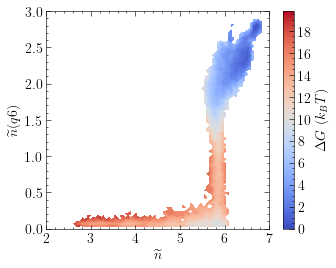

In [14]:
#Free energy surface
fig, ax, misc = pyemma.plots.plot_free_energy(
    *DataConc.T,
    weights=np.concatenate(bayesian_msm.trajectory_weights()),
    legacy=False,
#Other specifications
cmap='coolwarm',
cbar_label='$\Delta G$ ($k_BT$)')
ax.set_xlabel('$\widetilde{n}$');
ax.set_ylabel('$\widetilde{n}(q6)$');
ax.set_xlim(2, 7);
ax.set_ylim(0, 3);
plt.savefig(storing_path+"FES_1_1.png", dpi=600, bbox_inches='tight')

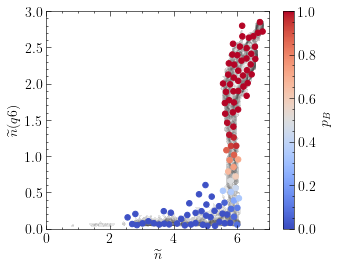

In [15]:
B = [24]
A = [14]
#Committor analysis
tpt = pyemma.msm.tpt(bayesian_msm, A, B)
fig, ax = plt.subplots()
pyemma.plots.plot_density(*DataConc.T, ax=ax, cbar=False, alpha=0.1, cmap='gray');
sc=ax.scatter(cluster.clustercenters.T[0,msm.active_set],cluster.clustercenters.T[1,msm.active_set], s=30, c=tpt.committor, cmap='coolwarm');
#Other specifications
plt.colorbar(sc,label='$p_B$')
ax.set_xlabel('$\widetilde{n}$');
ax.set_ylabel('$\widetilde{n}(q6)$');
ax.set_xlim(0, 7);
ax.set_ylim(0, 3);
plt.savefig(storing_path+"CP_1_2.png", dpi=600, bbox_inches='tight')

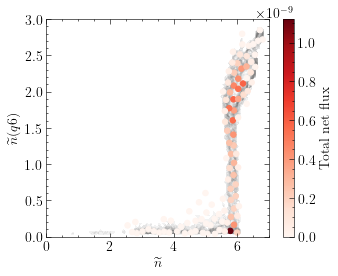

In [16]:
#Total net flux
flux = tpt.net_flux
F=0.5*flux.sum(axis=1)
fig, ax = plt.subplots()
pyemma.plots.plot_density(*DataConc.T, ax=ax, cbar=False, alpha=0.05, cmap='gray');
sc=ax.scatter(cluster.clustercenters.T[0,msm.active_set],cluster.clustercenters.T[1,msm.active_set], s=30, c=F, cmap='Reds');
#Other specifications
plt.colorbar(sc,label='Total net flux')
ax.set_xlabel('$\widetilde{n}$');
ax.set_ylabel('$\widetilde{n}(q6)$');
ax.set_xlim(0, 7);
ax.set_ylim(0, 3);
plt.savefig(storing_path+"TNF_1_3.png", dpi=600, bbox_inches='tight')

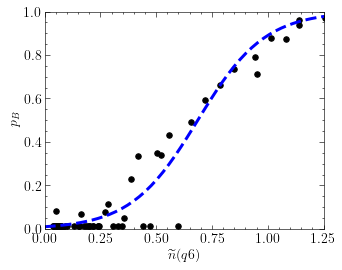

In [17]:
#Committor analysis projected in nq6 space
tpt = pyemma.msm.tpt(bayesian_msm, A, B)
fig, ax = plt.subplots()
sc=ax.scatter(cluster.clustercenters.T[1,msm.active_set],tpt.committor, s=30, c='k');
#Other specifications
ax.set_xlabel('$\widetilde{n}(q6)$');
ax.set_ylabel('$p_B$');
ax.set_xlim(0, 1.25);
ax.set_ylim(0, 1);
#Define sigmoid
def sigmoid(x, x0, k):
     y = 1 / (1 + np.exp(-k*(x-x0)))
     return y
xdata = np.sort(cluster.clustercenters.T[1,msm.active_set])
ydata = np.sort(tpt.committor)
#Fit sigmoid
popt, pcov = curve_fit(sigmoid, xdata, ydata)
x = np.linspace(0, 1.3, 50)
y = sigmoid(x, *popt)
pylab.plot(x,y, c='blue', linewidth=3, linestyle='dashed', zorder=1)
plt.savefig(storing_path+"CPP_1_2.png", dpi=600, bbox_inches='tight')

In [18]:
nstates = 2
#Mean first passage between the solution and crystal states using perron-cluster cluster analysis (PCCA++)
msm.pcca(nstates)
for i, s in enumerate(msm.metastable_sets):
    print('π_{} = {:f}'.format(i + 1, msm.pi[s].sum()))   
mfpt = np.zeros((nstates, nstates))
for i in range(nstates):
    for j in range(nstates):
        mfpt[i, j] = msm.mfpt(
            msm.metastable_sets[i],
            msm.metastable_sets[j])
from pandas import DataFrame
print('MFPT / steps:')
DataFrame(np.round(mfpt, decimals=2), index=range(1, nstates + 1), columns=range(1, nstates + 1))

π_1 = 0.000002
π_2 = 0.999998
MFPT / steps:


,1,2
1,0.000000e+00,15389.88
2,5.348837e+09,0.00


In [19]:
#Nucleation rate from the mean first passage between the solution and crystal states using PCCA++
print(mfpt[0,1])
Volume=799954 #Use the whole simulation box (in reduced units)
tau=1*mfpt[0,1] #(in reduced units)
Jmfpt=1/(tau*Volume)
print('Nucleation Rate:',Jmfpt)

15389.884117291083
Nucleation Rate: 8.122685457576317e-11
